In [41]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os,sys
sys.path.append(os.path.abspath('./')) #for import utility
from utility import plot_confusion_matrix,plot_decision_regions

In [45]:
iris = datasets.load_iris()
#print(iris['DESCR'])

In [53]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']]
iris_data.head(10)
#iris_data['target']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(
    #iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3,random_state = 0)

In [65]:
lr = LogisticRegression(solver='lbfgs',multi_class='auto') # multi_class=multinomial
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=0) #max_depth=1,3,12
clf_2 = DecisionTreeClassifier(criterion = 'gini', max_depth=3,random_state=0)

lr.fit(X_train,y_train)
print('logistic_training score:',lr.score(X_train, y_train))
print('logistic_test score:',lr.score(X_test, y_test))

clf.fit(X_train,y_train)
print('DT_training score:',clf.score(X_train,y_train))
print('DT_test score:',clf.score(X_test,y_test))

clf_2.fit(X_train,y_train)
print('DT2_training score:',clf_2.score(X_train,y_train))
print('DT2_test score:',clf_2.score(X_test,y_test))

logistic_training score: 0.9619047619047619
logistic_test score: 0.9555555555555556
DT_training score: 0.9619047619047619
DT_test score: 0.9111111111111111
DT2_training score: 0.9619047619047619
DT2_test score: 0.9111111111111111


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\mydata\python\機器學習\Unit05\Unit05\utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


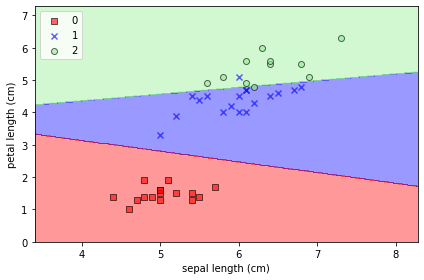

In [66]:
X_test_nd=X_test.values
plot_decision_regions(X_test_nd,y_test, classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\mydata\python\機器學習\Unit05\Unit05\utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


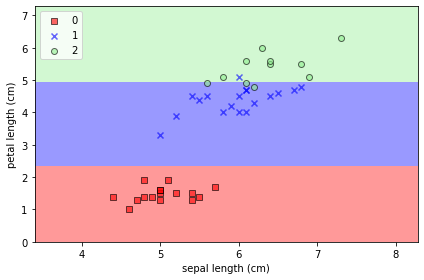

In [67]:
plot_decision_regions(X_test_nd,y_test, classifier=clf)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\mydata\python\機器學習\Unit05\Unit05\utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


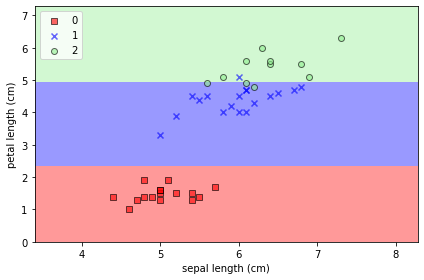

In [68]:
plot_decision_regions(X_test_nd,y_test, classifier=clf_2)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()